In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

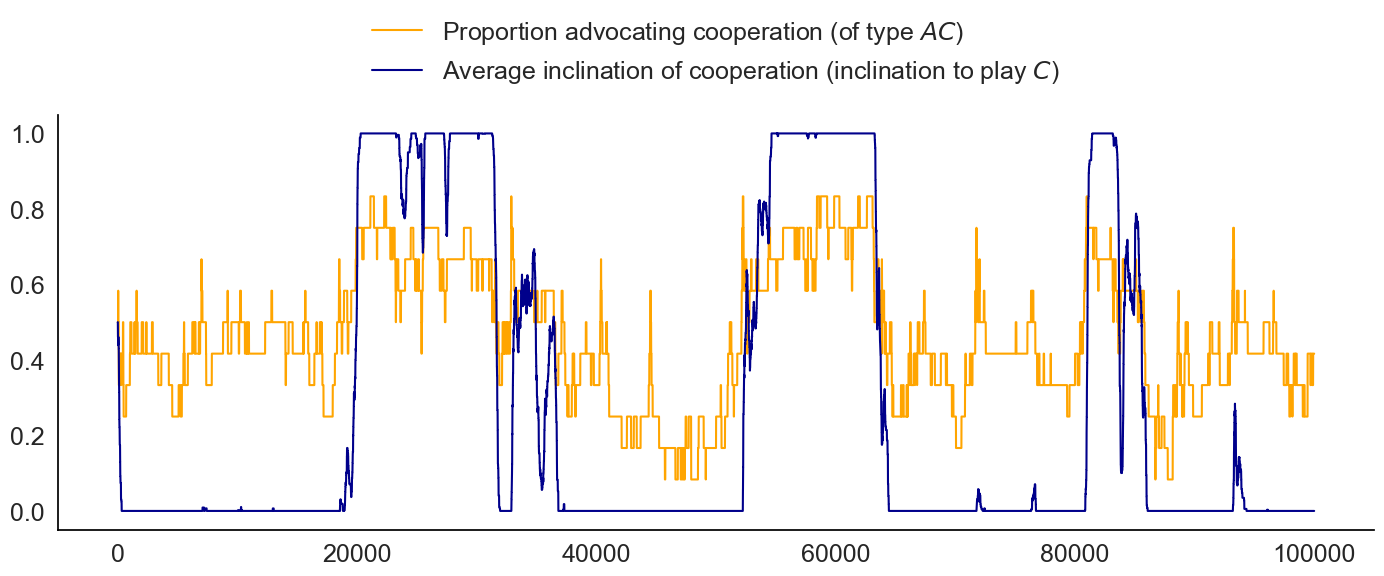

In [4]:
# Load the data
data = pd.read_csv('./simulation_explanation/model_data_init.csv')

fontsize = 18
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'black'})

# Create the plot
plt.figure(figsize=(14, 6))


# Plot "Proportion Advocating Cooperation" with orange color and no markers
plt.plot(data['step'], data['pr_adv_coop'], label='Proportion advocating cooperation (of type $AC$)', color='orange', linestyle='-')
# Plot "Average Inclination" with dark blue color and no markers
plt.plot(data['step'], data['avg_incl'], label='Average inclination of cooperation (inclination to play $C$)', color='darkblue', linestyle='-')

# Configure the x-axis label
plt.xlabel('', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
# Remove the y-axis label
plt.ylabel('')
plt.yticks(fontsize=fontsize)
# Add a legend
# move legend to center

# remove the box around the legend

plt.legend(loc='center', bbox_to_anchor=(0.5,1.15), fontsize=fontsize, frameon=False)


# Enable the grid for better readability
# make gride lighter

plt.grid(False)

sns.despine()

plt.tight_layout()
plt.savefig('example_run.pdf')
# Display the plot
plt.show()


In [5]:
data = pd.read_csv('./simulation_explanation/model_data_init.csv')  # Make sure to adjust this path to your data file

print(len(data))

print(len(data[data["game_type"]=="PD"]) / len(data))
print(len(data[data["game_type"]=="CH"]) / len(data))
print(len(data[data["game_type"]=="Cdom"]) / len(data))
print(len(data[data["game_type"]=="Ddom"]) / len(data))

print(len(data[data["game_type"]=="PD"]) / len(data) + len(data[data["game_type"]=="CH"]) / len(data) + len(data[data["game_type"]=="Cdom"]) / len(data) + len(data[data["game_type"]=="Ddom"]) / len(data))


100001
0.3651463485365146
0.10592894071059289
0.21458785412145878
0.3143368566314337
1.0


['PD' 'CH' 'Ddom' 'Cdom']


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41559/4237943407.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


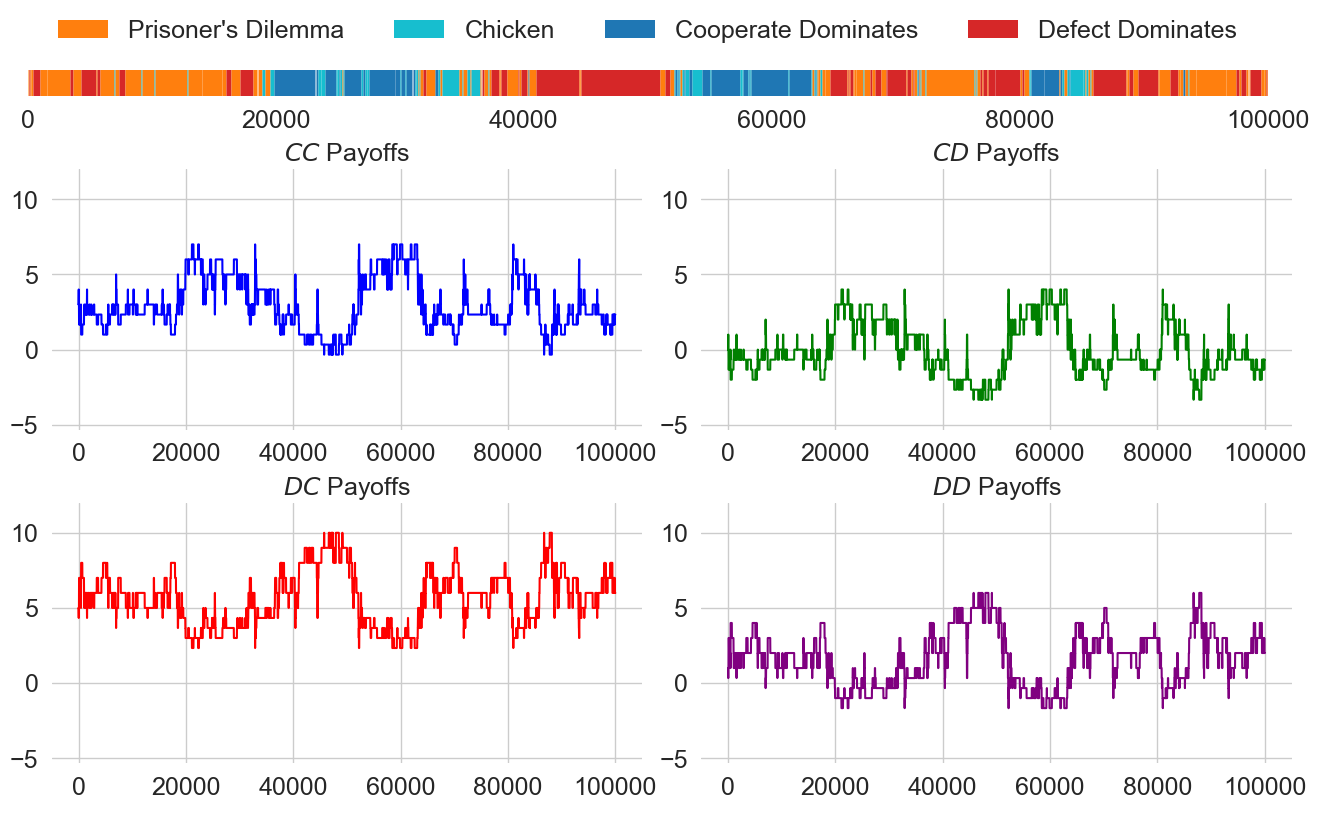

In [6]:
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

fontsize = 18
# Load your data
data = pd.read_csv('./simulation_explanation/model_data_init.csv')  # Make sure to adjust this path to your data file

# Mapping each unique game type to a color
unique_game_types = data['game_type'].unique()
print(unique_game_types)
colors = plt.cm.get_cmap('tab10', 10)
color_mapping = {
    #"PD": colors(9),  
     "CH": colors(9),
     "SH": colors(4),
     "PD": colors(1),  
     "Cdom": colors(0),
     "Ddom": colors(3),
     "Other": colors(7),
     }

# Group consecutive steps with the same game_type
grouped_data = data.groupby((data['game_type'] != data['game_type'].shift()).cumsum()).agg({'step': ['first', 'last'], 'game_type': 'first'})

# Creating the plot layout
# share the y-axis between the plots


fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(3, 2, height_ratios=[0.1, 1, 1], hspace=0.4, wspace=0.1)

# Creating the timeline_ax subplot with adjusted height
timeline_ax = fig.add_subplot(gs[0, :])  # Spanning all columns in the first row
for _, row in grouped_data.iterrows():
    start_step = row['step']['first']
    end_step = row['step']['last']
    game_type = row['game_type']['first']
    timeline_ax.plot([start_step, end_step], [1, 1], lw=25, solid_capstyle='butt', color=color_mapping[game_type])

# change the height of the timeline_ax  
timeline_ax.set_ylim(0.5, 1.5)
 
timeline_ax.set_xlim(0, data['step'].max())
timeline_ax.set_xlabel(' ')
timeline_ax.xaxis.set_visible(True)
timeline_ax.set_title('', loc='center', fontsize=fontsize)

game_type_descriptions = {
    'PD': "Prisoner's Dilemma",
    'CH': "Chicken",
    'Other': "Other",
    'Cdom': "Cooperate Dominates",
    'Ddom': "Defect Dominates"
}

# Use the mapping to create legend elements with full descriptions
legend_elements = [Patch(facecolor=color, edgecolor='none', label=game_type_descriptions.get(game_type, game_type)) for game_type, color in [
    ("PD", color_mapping["PD"]), 
    ("CH", color_mapping["CH"]),
    ("Cdom", color_mapping["Cdom"]),
    ("Ddom", color_mapping["Ddom"]),
    ("Other", color_mapping["Other"]),
    ] if game_type in unique_game_types]

# Add the legend to timeline_ax with the full descriptions
timeline_ax.legend(handles=legend_elements,  loc='center', bbox_to_anchor=(0.5, 2.5), ncols=4, title_fontsize=fontsize, fontsize=fontsize, frameon=False)


timeline_ax.yaxis.set_visible(False)

pos = timeline_ax.get_position()

# Adjust the 'left' position to shift the axes to the left
# For example, to shift it 5% to the left, subtract 0.05 from the 'left' value
new_left = pos.x0 - 0.015  # Adjust the value as needed for your desired shift

# Set the new position with the adjusted 'left'
# Make sure the new_left is not less than 0 to avoid placing it outside the figure
new_left = max(0, new_left)
timeline_ax.set_position([new_left, pos.y0, pos.width, pos.height])


max_payoff = max([data['cc'].max(), data['cd'].max(), data['dc'].max(), data['dd'].max()])
min_payoff = min([data['cc'].min(), data['cd'].min(), data['dc'].min(), data['dd'].min()])
ax1 = fig.add_subplot(gs[1, 0])

ax1.plot(data['step'], data['cc'], color='blue', linestyle='-')
ax1.set_title('$CC$ Payoffs', fontsize=fontsize)
ax1.set_xlabel(' ')
ax1.set_ylabel('')
ax1.set_ylim(min_payoff-2, max_payoff+2)

ax2 = fig.add_subplot(gs[1, 1], sharey=ax1)

ax2.plot(data['step'], data['cd'], color='green', linestyle='-')
ax2.set_title('$CD$ Payoffs', fontsize=fontsize)
ax2.set_xlabel(' ')
ax2.set_ylabel('')
ax2.set_ylim(min_payoff-2, max_payoff+2)

ax3 = fig.add_subplot(gs[2, 0])

ax3.plot(data['step'], data['dc'], color='red', linestyle='-')
ax3.set_title('$DC$ Payoffs', fontsize=fontsize)
ax3.set_xlabel(' ')
ax3.set_ylabel('')
ax3.set_ylim(min_payoff-2, max_payoff+2)
ax4 = fig.add_subplot(gs[2, 1], sharey=ax3)
ax4.plot(data['step'], data['dd'], color='purple', linestyle='-')
ax4.set_title('$DD$ Payoffs', fontsize=fontsize)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_ylim(min_payoff-2, max_payoff+2)

timeline_ax.tick_params(axis='x', labelsize=fontsize)  # Change '10' to your desired font size
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)  

ax2.tick_params(axis='x', labelsize=fontsize)
ax2.tick_params(axis='y', labelsize=fontsize)  

ax3.tick_params(axis='x', labelsize=fontsize)
ax3.tick_params(axis='y', labelsize=fontsize)  

ax4.tick_params(axis='x', labelsize=fontsize)
ax4.tick_params(axis='y', labelsize=fontsize)  


sns.despine(right=True, bottom=True, top=True, left=True)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

#plt.tight_layout()
plt.savefig('example_run_game_changes.pdf')

plt.show()


/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41559/2873143897.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_players)


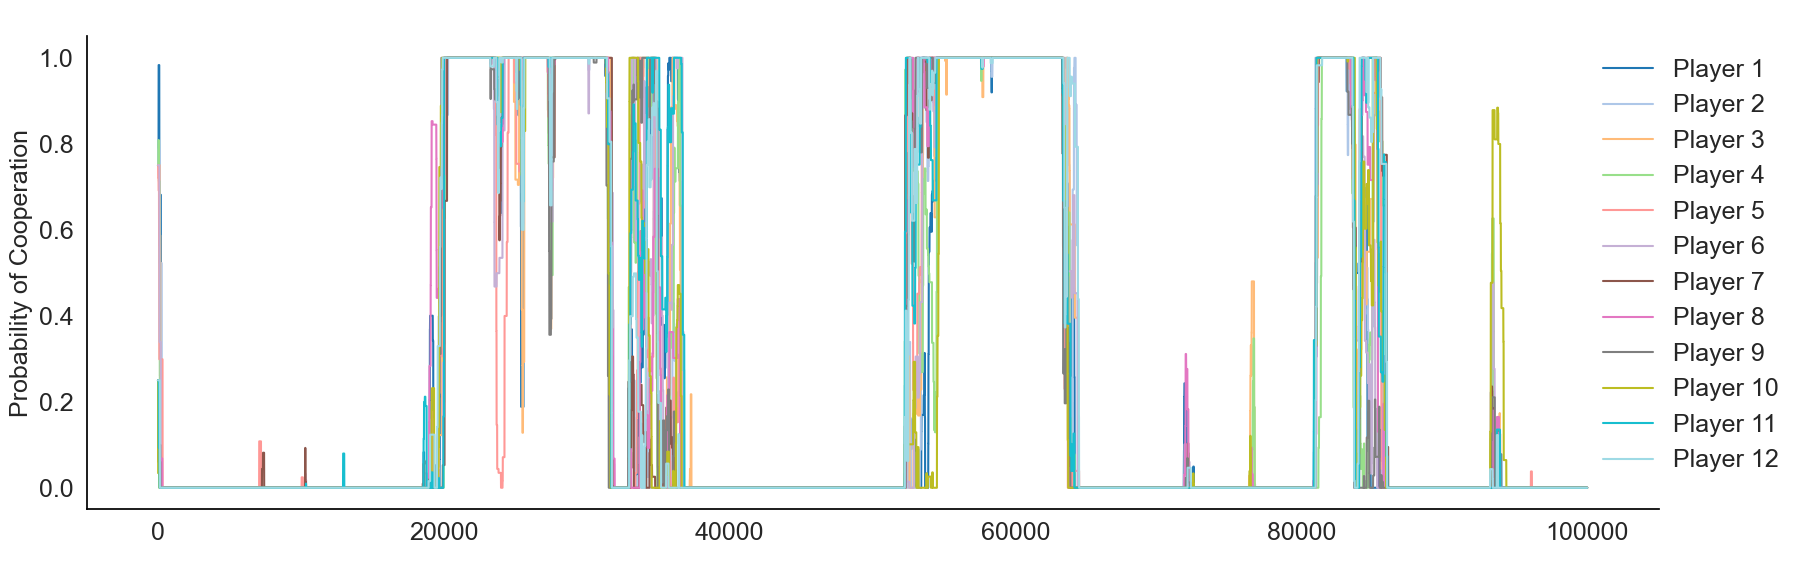

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data
data = pd.read_csv('./simulation_explanation/agent_data_init.csv')

# Set font size for readability
fontsize = 18

# Set the figure size
plt.figure(figsize=(24, 6))

# Use white grid style but remove vertical grid lines and use black for the axis lines
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'black'})

# Get unique player IDs and the number of players for the colormap
player_ids = data['id'].unique()
num_players = len(player_ids)

# Color map for players
colors = plt.cm.get_cmap('tab20', num_players)

# Iterate over each player ID and plot their pr_coop over steps with a unique color
for i, player_id in enumerate(player_ids):
    player_data = data[data['id'] == player_id]
    plt.plot(player_data['step'], player_data['pr_coop'], label=f'Player {player_id}', color=colors(i))

# Set the title, x-label, and y-label
plt.title(' ', fontsize=fontsize)
plt.xlabel(' ', fontsize=fontsize)
plt.ylabel('Probability of Cooperation', fontsize=fontsize)

# Set tick parameters
plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

# Place the legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(0.95, 1), title='', fontsize=fontsize, frameon=False)

# Adjust the layout to make room for the legend and to ensure the layout fits well
plt.tight_layout(rect=[0, 0, 0.75, 1])

sns.despine()
# Save the plot
plt.savefig("example_run_each_player.pdf")

# Display the plot
plt.show()

/var/folders/zw/wyk4bycs5sjb6lt2q2xgbf040000gn/T/ipykernel_41559/2554295131.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_players)


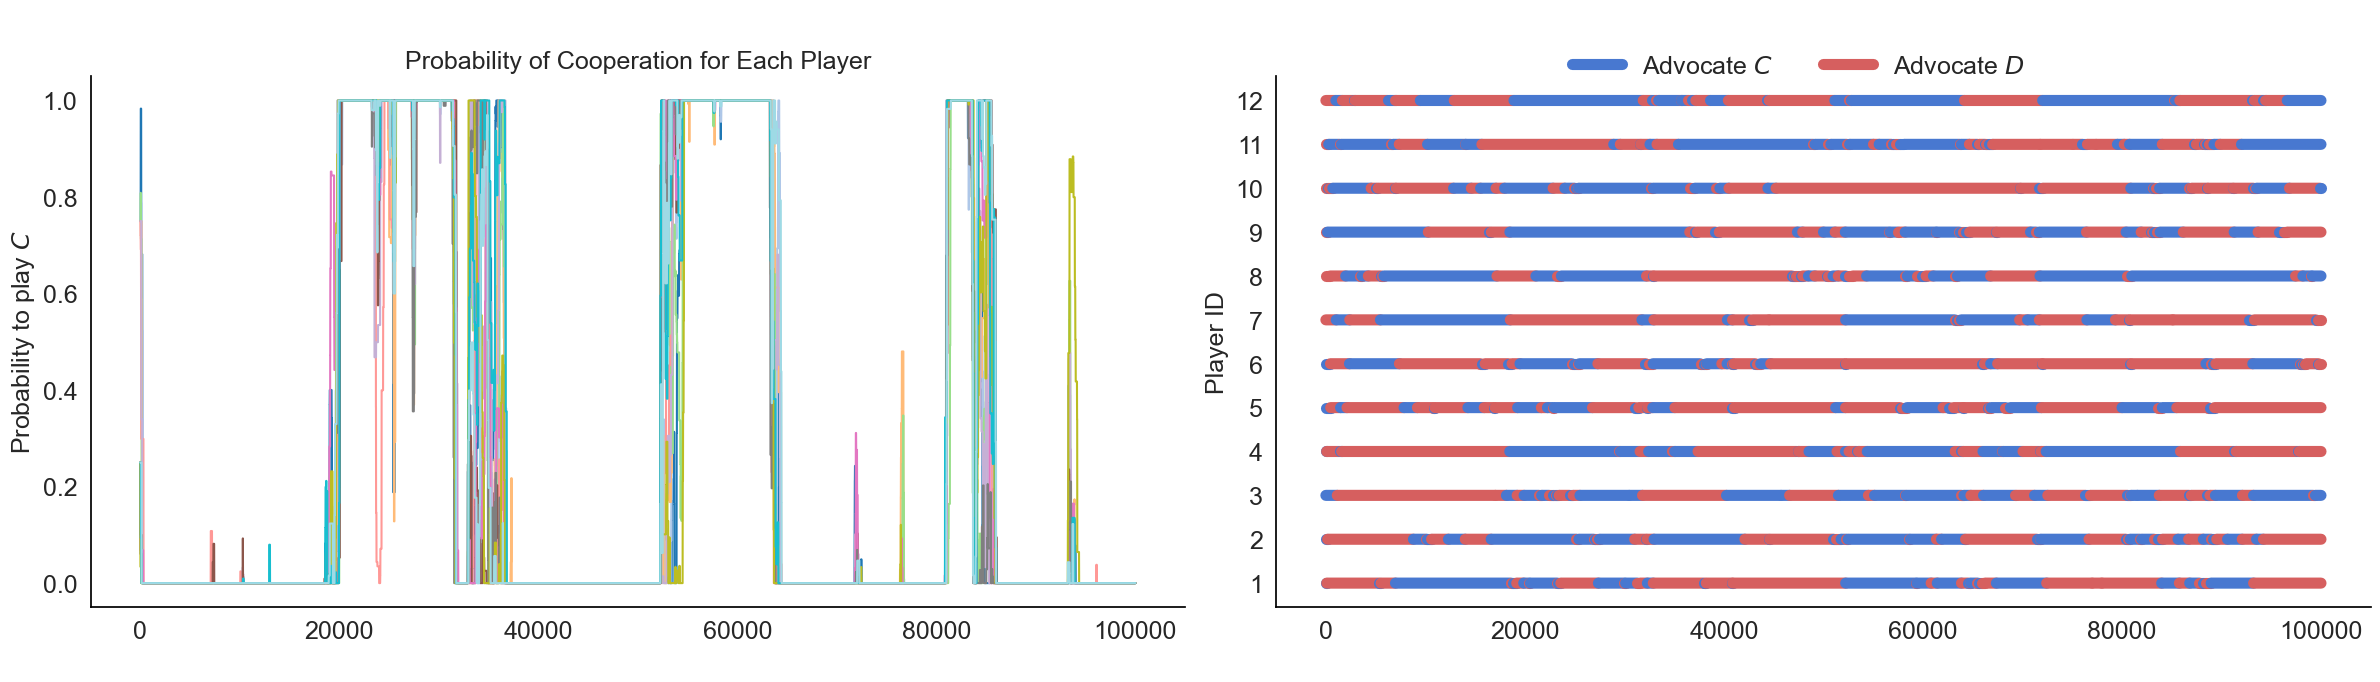

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load your data
data = pd.read_csv('./simulation_explanation/agent_data_init.csv')

# Set font size for readability
fontsize = 18
# sns.set style to achieve despine effectively
#sns.set_style(style="whitegrid", rc={"axes.spines.bottom": True, "axes.spines.left": True, "axes.spines.right": False, "axes.spines.top": False, 'axes.grid' : False, 'axes.edgecolor': 'black'})


# Set up the subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 7))

sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'black'})

# Plot 1: Probability of Cooperation (pr_coop) for each agent
player_ids = data['id'].unique()
num_players = len(player_ids)
colors = plt.cm.get_cmap('tab20', num_players)

for i, player_id in enumerate(player_ids):
    player_data = data[data['id'] == player_id]
    axes[0].plot(player_data['step'], player_data['pr_coop'], label=f'Player {player_id}', color=colors(i))

axes[0].set_title('Probability of Cooperation for Each Player', fontsize=fontsize)
axes[0].set_xlabel(' ', fontsize=fontsize)
axes[0].set_ylabel('Probability to play $C$', fontsize=fontsize)
axes[0].tick_params(axis='x', labelsize=fontsize)
axes[0].tick_params(axis='y', labelsize=fontsize)

palette = sns.color_palette("muted")  # This will give a list of colors

cooperative_color = palette[0]  # Typically a nice blue
non_cooperative_color = palette[3]  # Typically a good contrasting red

# Plot 2: adv_coop status with changing colors
for player_id in player_ids:
    player_data = data[data['id'] == player_id].sort_values(by='step')
    start_index = 0
    for i in range(1, len(player_data)):
        if player_data.iloc[i]['adv_coop'] != player_data.iloc[i-1]['adv_coop'] or i == len(player_data) - 1:
            segment = player_data.iloc[start_index:i+1]
            color = cooperative_color if player_data.iloc[start_index]['adv_coop'] else non_cooperative_color
            axes[1].step(segment['step'], [player_id] * len(segment), where='post', color=color, linewidth=8)
            start_index = i

axes[1].set_title(' ', fontsize=fontsize)
axes[1].set_xlabel(' ', fontsize=fontsize)
axes[1].set_ylabel('Player ID', fontsize=fontsize)
axes[1].set_yticks(player_ids)  # Set y-ticks as player IDs

axes[1].tick_params(axis='x', labelsize=fontsize)
axes[1].tick_params(axis='y', labelsize=fontsize)

axes[1].grid(False)

# Adjust layout and add a legend outside the plot area for the second plot
handles = [plt.Line2D([0], [0], color=cooperative_color, lw=8, label='Advocate $C$'), plt.Line2D([0], [0], color=non_cooperative_color, lw=8, label='Advocate $D$')]
axes[1].legend(handles=handles, loc='upper left', bbox_to_anchor=(0.25, 1.15), title=' ', title_fontsize=fontsize, fontsize=fontsize, ncol=2, frameon=False)

fig.tight_layout()
sns.despine()
plt.savefig('example_run_with_advocate_status.pdf')
# Show the plot
plt.show()
